In [10]:
import pandas as pd

# Load the dataset from the uploaded Excel file
file_path = 'open_crosion.xlsx'
corrosion_data = pd.read_excel(file_path)

# Display the first few rows of the dataset to understand its structure
corrosion_data.head()

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Label,Experiment,X-Coordinate,Y-Coordinate,Specimen
0,-0.793526,-0.564884,-0.918486,-2.643592,-0.405808,1.555672,-1.282668,1,5,53.5,40.0,1
1,-1.131818,-0.564884,-0.934511,-2.750356,-0.279310,1.275645,-2.688708,1,5,54.0,30.5,1
2,-1.120734,-0.564884,-0.951459,-2.863264,-0.298150,1.378301,-2.487164,1,5,54.0,31.0,1
3,-1.106464,-0.564884,-0.968407,-2.976173,-0.316991,1.480956,-2.505143,1,5,54.0,31.5,1
4,-1.090652,-0.564884,-0.985354,-3.089081,-0.335831,1.583612,-2.578003,1,5,54.0,32.0,1


### Data Exploration Summary:
- Label Distribution: The dataset appears to be imbalanced, with fewer instances of corrosion (Label = 1) compared to non-corrosion spots (Label = 0).

- Spatial Distribution: The scatter plot provides a view of the spatial distribution of corrosion and non-corrosion spots. It appears that corrosion spots are clustered in certain areas.

- Feature Summary: The features appear to be centered around zero, with varying degrees of spread.

c:\Users\gzia\Documents\GitHub\reincarnate_wp2\.wp2\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\gzia\Documents\GitHub\reincarnate_wp2\.wp2\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\gzia\Documents\GitHub\reincarnate_wp2\.wp2\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


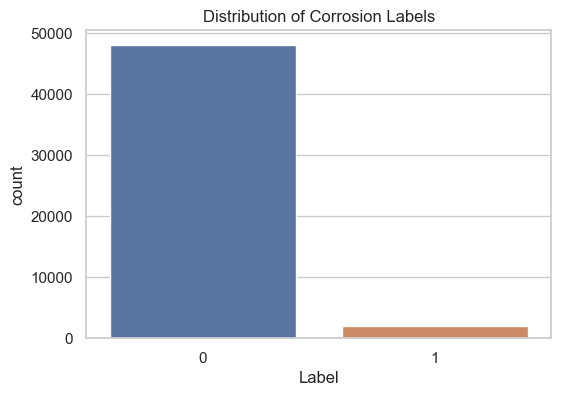

c:\Users\gzia\Documents\GitHub\reincarnate_wp2\.wp2\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\gzia\Documents\GitHub\reincarnate_wp2\.wp2\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\gzia\Documents\GitHub\reincarnate_wp2\.wp2\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\gzia\Documents\GitHub\reincarnate_wp2\.wp2\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

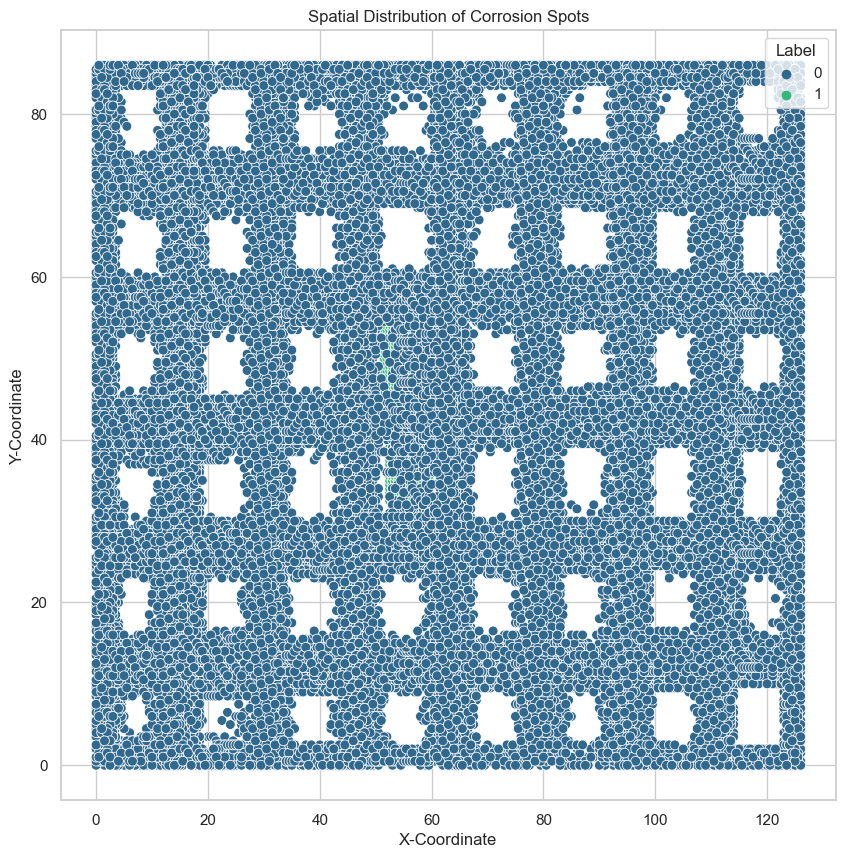

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7
count,50037.000000,50037.000000,50037.000000,50037.000000,50037.000000,50037.000000,50037.000000
mean,-0.149966,-0.115399,0.153936,-0.064222,0.159432,0.170847,-0.033986
std,0.992898,0.979286,1.019545,1.151357,0.988615,1.008026,1.016787
min,-2.498831,-2.824418,-1.737807,-5.488779,-1.235077,-2.038964,-4.136656
25%,-0.825852,-0.564884,-0.556046,-0.528000,-0.429362,-0.559605,-0.696185
50%,-0.063535,-0.564884,-0.014326,-0.041514,-0.010686,0.021571,-0.047811
75%,0.486279,0.564884,1.034440,0.433122,0.433741,0.656665,0.572617
max,2.459097,1.694651,3.052359,6.058121,6.709311,3.063755,8.485133


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Plot the distribution of the Label (corrosion presence)
plt.figure(figsize=(6, 4))
sns.countplot(x='Label', data=corrosion_data)
plt.title('Distribution of Corrosion Labels')
plt.show()

# Plot the spatial distribution of the corrosion spots
plt.figure(figsize=(10, 10))
sns.scatterplot(x='X-Coordinate', y='Y-Coordinate', hue='Label', data=corrosion_data, palette='viridis', s=50)
plt.title('Spatial Distribution of Corrosion Spots')
plt.show()

# Summary statistics for the features
feature_columns = [f'Feature {i}' for i in range(1, 8)]
corrosion_data[feature_columns].describe()


### Modeling Steps:
1. Data Preparation: Split the data into training and validation sets. Include spatial coordinates as features.

2. Initial Model Training: Train a simple model (e.g., logistic regression) on the training data.

3. Performance Evaluation: Evaluate the model on the validation set.

4. Adaptive Sampling Simulation: Use the model to simulate where to collect additional data.

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Prepare the features and labels
X = corrosion_data[['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5', 'Feature 6', 'Feature 7', 'X-Coordinate', 'Y-Coordinate']]
y = corrosion_data['Label']

# Split the data into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Train a logistic regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Evaluate the model on the validation set
y_val_pred = log_reg.predict(X_val_scaled)
y_val_prob = log_reg.predict_proba(X_val_scaled)[:, 1]  # probabilities for the positive class

# Classification report and ROC AUC score
print("Classification Report:")
print(classification_report(y_val, y_val_pred))
print("ROC AUC Score:", roc_auc_score(y_val, y_val_prob))


Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      9617
           1       0.87      0.75      0.81       391

    accuracy                           0.99     10008
   macro avg       0.93      0.87      0.90     10008
weighted avg       0.99      0.99      0.99     10008

ROC AUC Score: 0.9899666165547103


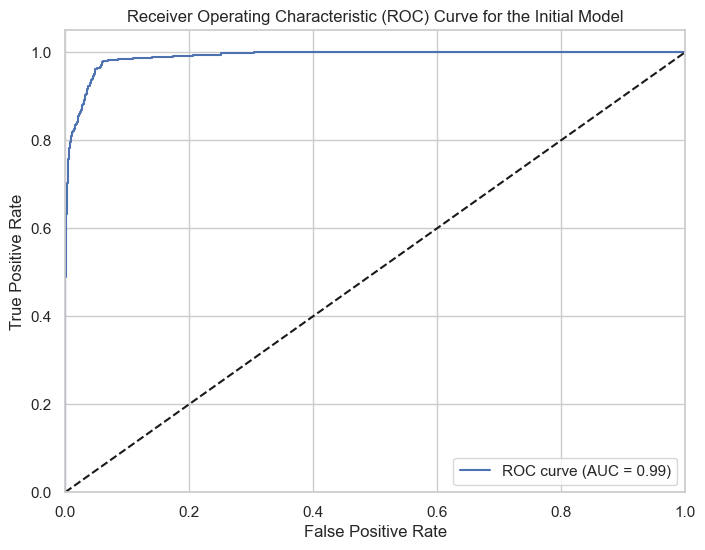

In [28]:
# Generate ROC curve values based on the logistic regression model and validation set
fpr, tpr, thresholds = roc_curve(y_val, y_val_prob)

# Calculate AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_val, y_val_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for the Initial Model')
plt.legend(loc="lower right")
plt.show()


### Model Evaluation Summary:
- Classification Report: The logistic regression model shows high precision and recall for the non-corrosion class (Label = 0). For the corrosion class (Label = 1), the model also performs reasonably well, with a recall of 0.75 and precision of 0.87.

- ROC AUC Score: The ROC AUC score is approximately 0.99, indicating that the model has a high ability to distinguish between corrosion and non-corrosion classes

### Next Steps: Adaptive Sampling Simulation
Given the high performance of the model, we can now use it to simulate an adaptive sampling strategy. Specifically, we'll:

- Identify Regions of High Uncertainty: Use the model to predict probabilities for all points in the validation set and identify regions where the model is less certain.

- Acquisition Function: Design an acquisition function that takes into account both the model's predictions and the spatial coordinates to suggest where to "sample" next.

- Simulate Adaptive Sampling: Simulate the process of collecting additional samples based on the acquisition function and update the model.

In [22]:
import numpy as np

# Calculate the uncertainty (1 - predicted probability) for each point in the validation set
uncertainty = 1 - np.abs(y_val_prob - 0.5) * 2

# Create a DataFrame to hold the validation data along with predicted probabilities and uncertainties
val_data_with_uncertainty = X_val.copy()
val_data_with_uncertainty['Predicted Probability'] = y_val_prob
val_data_with_uncertainty['Uncertainty'] = uncertainty

# Sort the DataFrame based on the uncertainty to find the top regions to sample next
top_uncertain_points = val_data_with_uncertainty.sort_values(by='Uncertainty', ascending=False).head(20)

# Display the top 20 points with the highest uncertainty
top_uncertain_points


,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,X-Coordinate,Y-Coordinate,Predicted Probability,Uncertainty
627,-0.830237,-0.564884,-0.714845,-2.699539,1.086018,0.108792,-2.162165,58.5,34.0,0.500295,0.999410
863,-1.430625,-0.564884,-1.661488,-1.266867,-1.031012,1.684624,-0.758841,58.0,31.5,0.502271,0.995458
13892,0.068140,0.564884,-0.728606,-1.378583,-0.280541,0.747951,-1.319897,47.5,45.0,0.497479,0.994957
25842,0.461021,0.564884,-1.308676,-1.732272,-0.466488,0.178815,-1.129652,111.5,34.0,0.504163,0.991674
848,-1.550636,-1.129767,-1.675709,-1.361608,-1.031012,1.709951,-0.722840,57.5,35.0,0.504983,0.990034
625,-0.812133,-0.564884,-0.711714,-2.678681,1.085594,0.116005,-2.162165,58.5,33.0,0.493446,0.986891
22375,-1.407392,-0.564884,-1.590327,-0.792782,-1.031012,1.414867,-1.767198,68.0,30.0,0.507235,0.985530
19404,-0.849499,-0.564884,-0.726659,-2.778245,0.736797,0.062989,-1.557400,52.5,29.0,0.490464,0.980929
22013,-1.500703,-0.564884,-1.591347,-0.799580,-1.031012,1.919872,-1.288733,49.5,45.5,0.487716,0.975432
47095,-0.293882,0.000000,-0.869112,-2.367102,0.170301,-0.344491,-1.969143,112.5,16.0,0.512574,0.974852


We've identified the top 20 points in the validation set where the model has the highest uncertainty. These points would be our candidates for the next round of sampling in a real-world scenario.

In [23]:
# "Sample" the top uncertain points by incorporating them into the training set
X_train_new = pd.concat([X_train, top_uncertain_points.drop(['Predicted Probability', 'Uncertainty'], axis=1)])
y_train_new = pd.concat([y_train, y_val.loc[top_uncertain_points.index]])

# Standardize the updated training set
X_train_new_scaled = scaler.fit_transform(X_train_new)

# Train the updated logistic regression model
log_reg_updated = LogisticRegression(random_state=42)
log_reg_updated.fit(X_train_new_scaled, y_train_new)

# Evaluate the updated model on the same validation set
y_val_pred_updated = log_reg_updated.predict(X_val_scaled)
y_val_prob_updated = log_reg_updated.predict_proba(X_val_scaled)[:, 1]  # probabilities for the positive class

# Classification report and ROC AUC score for the updated model
print("Classification Report for Updated Model:")
print(classification_report(y_val, y_val_pred_updated))
print("ROC AUC Score for Updated Model:", roc_auc_score(y_val, y_val_prob_updated))


Classification Report for Updated Model:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      9617
           1       0.87      0.75      0.81       391

    accuracy                           0.99     10008
   macro avg       0.93      0.87      0.90     10008
weighted avg       0.99      0.99      0.99     10008

ROC AUC Score for Updated Model: 0.9899525217359393


### Updated Model Evaluation Summary:
- Classification Report: The updated logistic regression model maintains high performance, with similar precision, recall, and F1-scores for both the corrosion and non-corrosion classes compared to the initial model.

- ROC AUC Score: The ROC AUC score for the updated model is approximately 0.99, very close to the initial model's score.

c:\Users\gzia\Documents\GitHub\reincarnate_wp2\.wp2\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\gzia\Documents\GitHub\reincarnate_wp2\.wp2\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\gzia\Documents\GitHub\reincarnate_wp2\.wp2\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\gzia\Documents\GitHub\reincarnate_wp2\.wp2\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

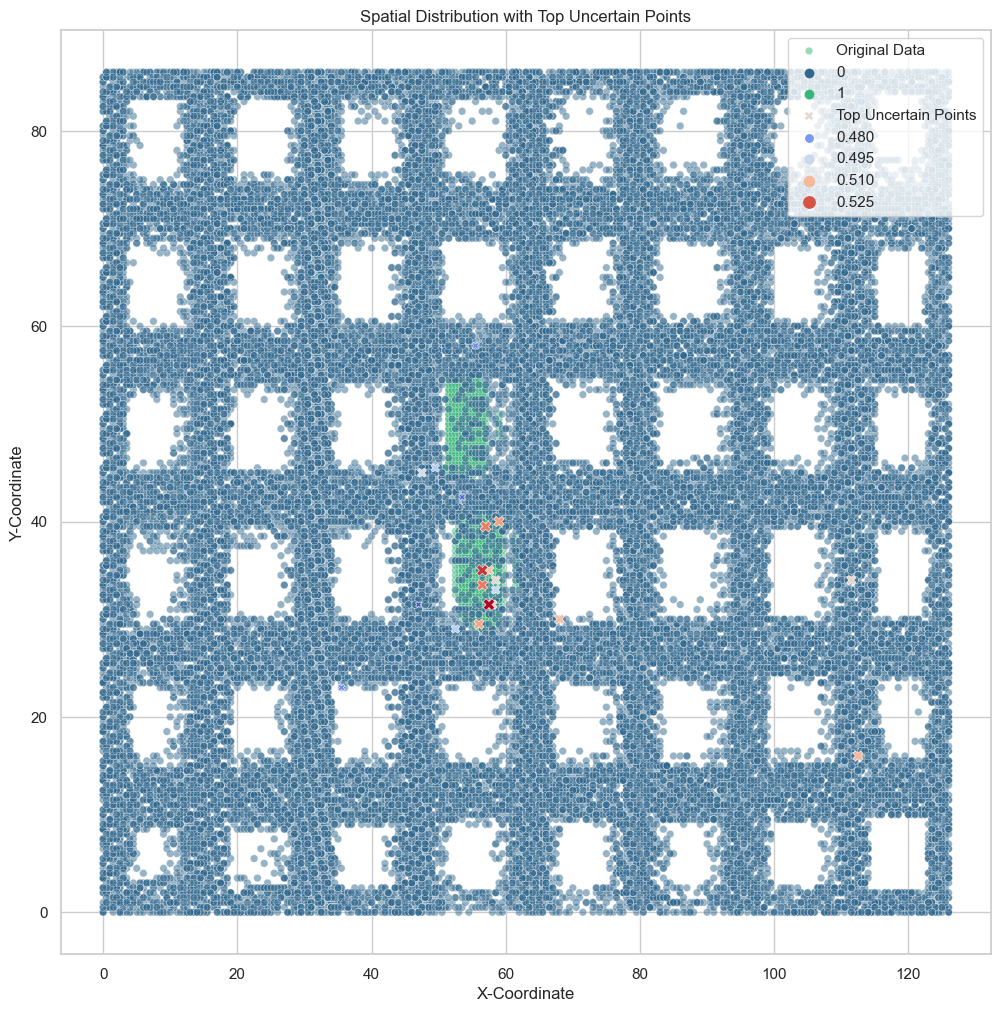

In [24]:
# Predict the label probabilities for the top uncertain points using the updated model
top_uncertain_points_scaled = scaler.transform(top_uncertain_points.drop(['Predicted Probability', 'Uncertainty'], axis=1))
top_uncertain_points['Updated Predicted Probability'] = log_reg_updated.predict_proba(top_uncertain_points_scaled)[:, 1]

# Plot the spatial distribution of the corrosion spots along with the top uncertain points
plt.figure(figsize=(12, 12))
sns.scatterplot(x='X-Coordinate', y='Y-Coordinate', hue='Label', data=corrosion_data, palette='viridis', s=30, alpha=0.5, label='Original Data')
sns.scatterplot(x='X-Coordinate', y='Y-Coordinate', hue='Updated Predicted Probability', size='Updated Predicted Probability',
                palette='coolwarm', data=top_uncertain_points, s=100, marker='X', label='Top Uncertain Points')
plt.title('Spatial Distribution with Top Uncertain Points')
plt.legend()
plt.show()


The plot shows the spatial distribution of the original corrosion and non-corrosion spots along with the top 20 uncertain points identified by the model. The uncertain points are marked with 'X' symbols and are color-coded based on their updated predicted probabilities of being corrosion spots. As you can see, these points are in regions where the model had the highest uncertainty.

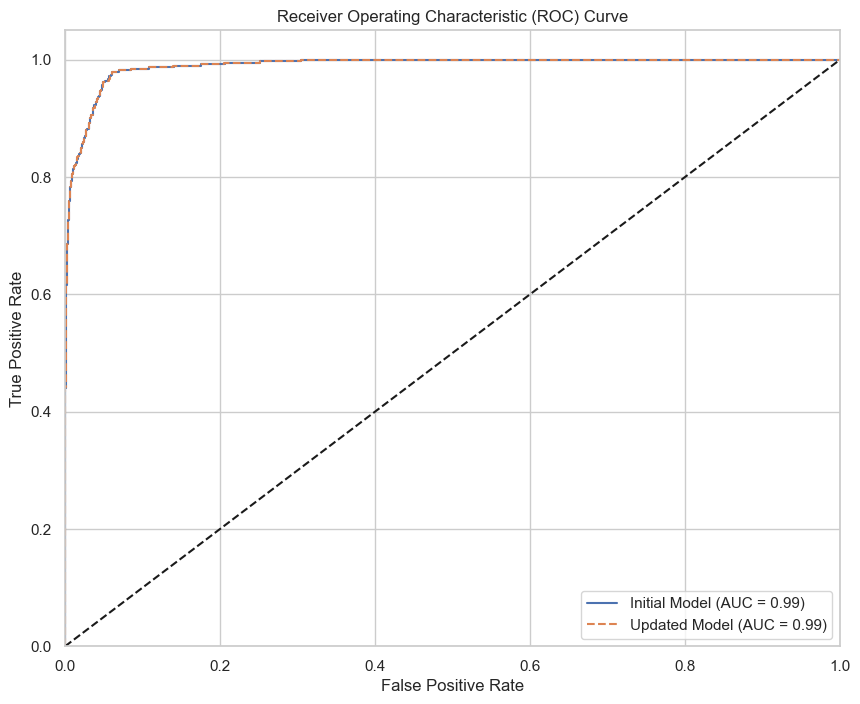

In [29]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Generate ROC curve values based on the initial logistic regression model and validation set
fpr_initial, tpr_initial, _ = roc_curve(y_val, y_val_prob)
roc_auc_initial = roc_auc_score(y_val, y_val_prob)

# Generate ROC curve values based on the updated logistic regression model and the same validation set
fpr_updated, tpr_updated, _ = roc_curve(y_val, y_val_prob_updated)
roc_auc_updated = roc_auc_score(y_val, y_val_prob_updated)

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr_initial, tpr_initial, label=f'Initial Model (AUC = {roc_auc_initial:.2f})')
plt.plot(fpr_updated, tpr_updated, label=f'Updated Model (AUC = {roc_auc_updated:.2f})', linestyle='--')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


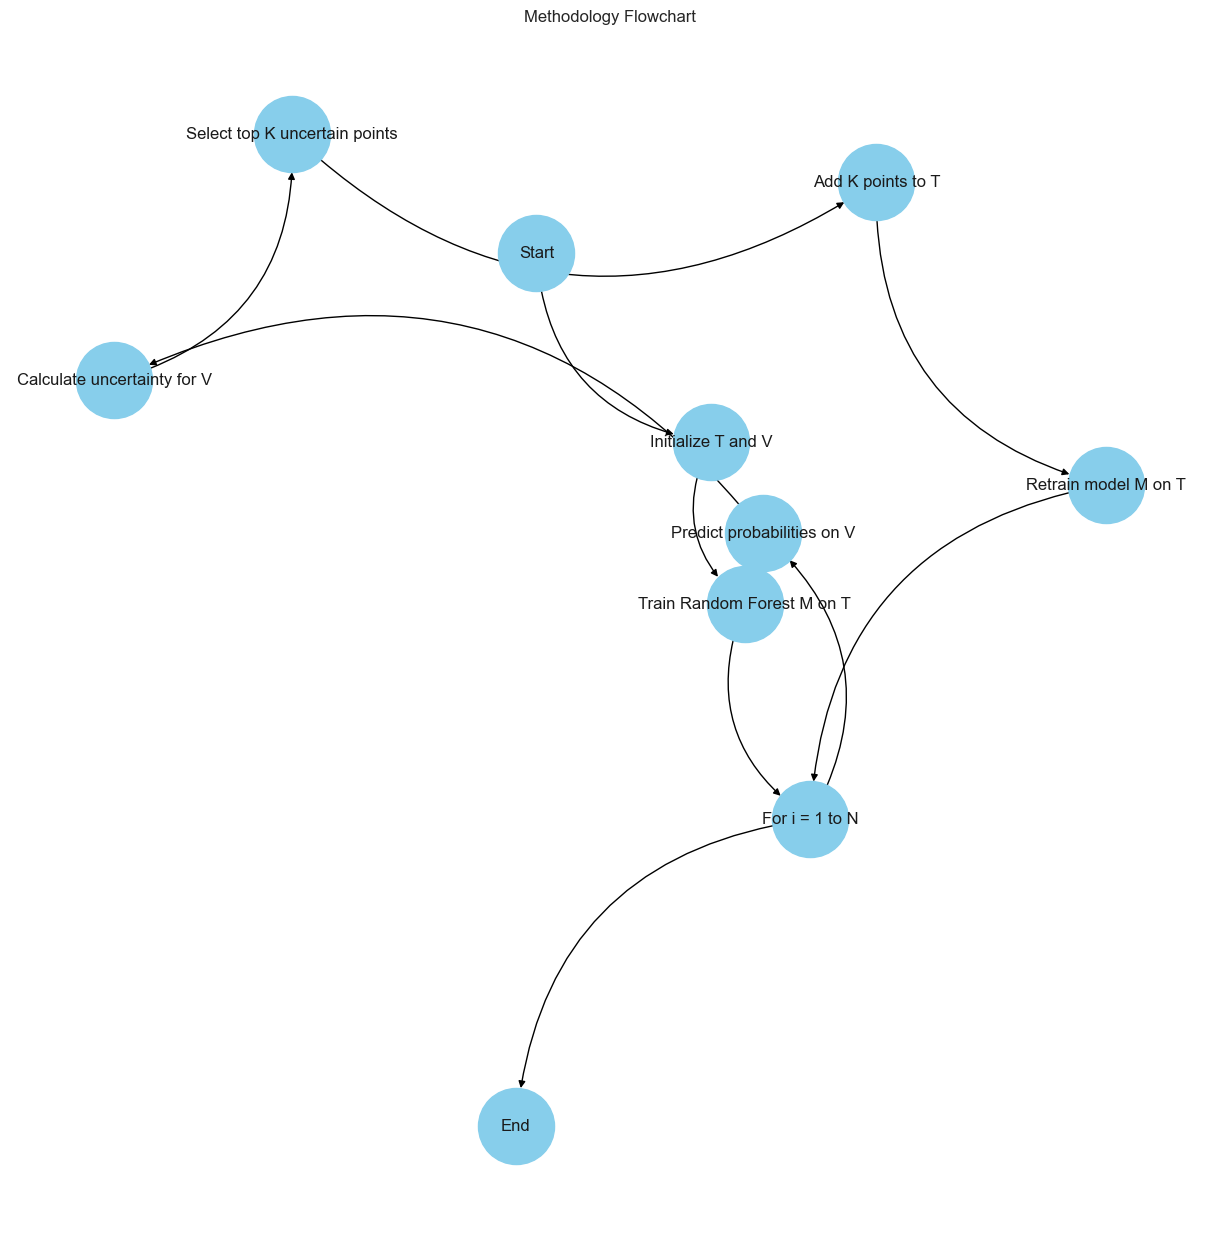

In [42]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add nodes with their descriptions
nodes = {
    'start': 'Start',
    'init_sets': 'Initialize T and V',
    'train_rf': 'Train Random Forest M on T',
    'for_loop': 'For i = 1 to N',
    'pred_prob': 'Predict probabilities on V',
    'calc_uncertainty': 'Calculate uncertainty for V',
    'select_points': 'Select top K uncertain points',
    'add_to_t': 'Add K points to T',
    'retrain_model': 'Retrain model M on T',
    'end': 'End'
}

G.add_nodes_from(nodes.keys())

# Add edges representing the flow
edges = [
    ('start', 'init_sets'),
    ('init_sets', 'train_rf'),
    ('train_rf', 'for_loop'),
    ('for_loop', 'pred_prob'),
    ('pred_prob', 'calc_uncertainty'),
    ('calc_uncertainty', 'select_points'),
    ('select_points', 'add_to_t'),
    ('add_to_t', 'retrain_model'),
    ('retrain_model', 'for_loop'),
    ('for_loop', 'end')
]

G.add_edges_from(edges)

# Draw the graph
pos = nx.spring_layout(G, seed=42)
labels = {k: nodes[k] for k in G.nodes()}

plt.figure(figsize=(12, 12))
nx.draw(G, pos, with_labels=False, node_color='skyblue', font_size=12, node_size=3000, edge_color='black', linewidths=1, font_color='black', arrows=True, connectionstyle='arc3,rad=0.4')
nx.draw_networkx_labels(G, pos, labels, font_size=12)
plt.title('Methodology Flowchart')
plt.show()


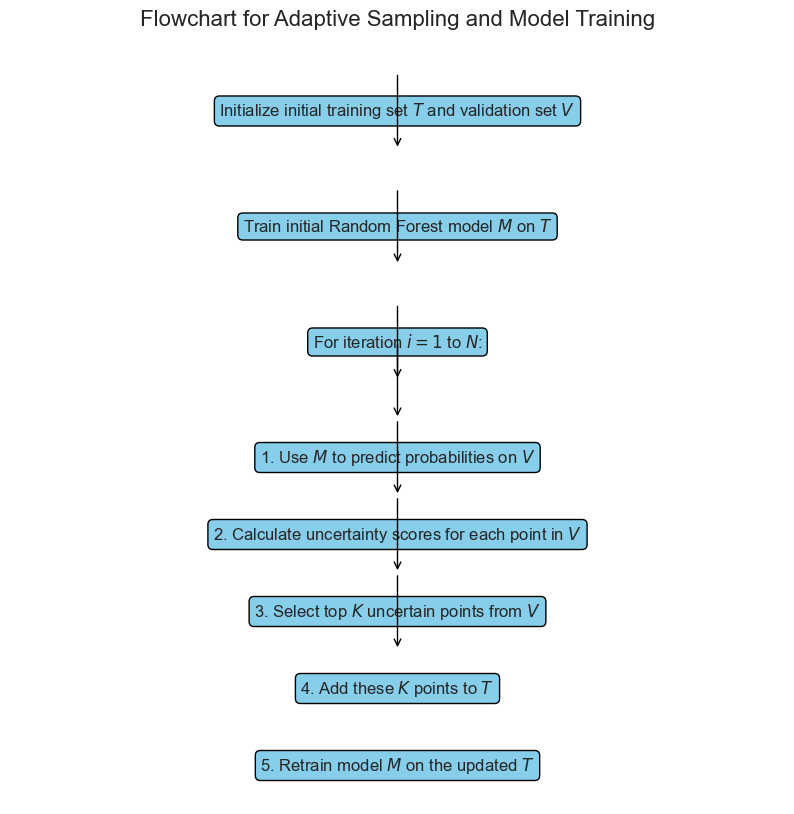

'adaptive_sampling_flowchart.png'

In [37]:
# Trying again with fixed properties for box style
fig, ax = plt.subplots(figsize=(10, 10))
ax.axis('off')

# Create boxes
box_style = dict(boxstyle='round', facecolor='skyblue', edgecolor='black')
arrow_style = {'arrowstyle': '->', 'lw': 2, 'color': 'black'}
textprops = {'fontsize': 12, 'horizontalalignment': 'center', 'verticalalignment': 'center'}

# Step boxes
ax.text(0.5, 0.9, 'Initialize initial training set $T$ and validation set $V$', **textprops, bbox=box_style)
ax.text(0.5, 0.75, 'Train initial Random Forest model $M$ on $T$', **textprops, bbox=box_style)
ax.text(0.5, 0.6, 'For iteration $i=1$ to $N$:', **textprops, bbox=box_style)
ax.text(0.5, 0.45, '1. Use $M$ to predict probabilities on $V$', **textprops, bbox=box_style)
ax.text(0.5, 0.35, '2. Calculate uncertainty scores for each point in $V$', **textprops, bbox=box_style)
ax.text(0.5, 0.25, '3. Select top $K$ uncertain points from $V$', **textprops, bbox=box_style)
ax.text(0.5, 0.15, '4. Add these $K$ points to $T$', **textprops, bbox=box_style)
ax.text(0.5, 0.05, '5. Retrain model $M$ on the updated $T$', **textprops, bbox=box_style)

# Arrows
arrowprops = dict(facecolor='black', edgecolor='black', arrowstyle='->')
for y in [0.85, 0.7, 0.55, 0.5, 0.4, 0.3, 0.2]:
    plt.annotate('', xy=(0.5, y), xytext=(0.5, y + 0.1), arrowprops=arrowprops)

plt.title('Flowchart for Adaptive Sampling and Model Training', fontsize=16)
plt.show()

# Save the figure
flowchart_path = 'adaptive_sampling_flowchart.png'
fig.savefig(flowchart_path)

flowchart_path
